In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()  # upload kaggle.json


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"moulyathirukovela","key":"40e82321816e03325b8452dbd457c900"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d sobhanmoosavi/us-accidents


Dataset URL: https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents
License(s): CC-BY-NC-SA-4.0
 94% 611M/653M [00:03<00:00, 152MB/s]
100% 653M/653M [00:03<00:00, 204MB/s]


In [ ]:
!ls



kaggle.json  sample_data  us-accidents.zip


In [ ]:
import zipfile

with zipfile.ZipFile("us-accidents.zip", "r") as zip_ref:
    zip_ref.extractall("us_accidents_data")


In [ ]:
!ls us_accidents_data


US_Accidents_March23.csv


In [ ]:
import pandas as pd

data = pd.read_csv("us_accidents_data/US_Accidents_March23.csv")
print("Shape:", data.shape)
data.head()


KeyboardInterrupt: 

In [ ]:
import pandas as pd

# Load CSV
df = pd.read_csv("us_accidents_data/US_Accidents_March23.csv")

# Show basic info
print("Dataset shape:", df.shape)
df.head()


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipython-input-3981092662.py", line 4, in <cell line: 0>
    df = pd.read_csv("us_accidents_data/US_Accidents_March23.csv")
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pandas/io/parsers/readers.py", line 1026, in read_csv
    return _read(filepath_or_buffer, kwds)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pandas/io/parsers/readers.py", line 626, in _read
    return parser.read(nrows)
           ^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pandas/io/parsers/readers.py", line 1923, in read
    ) = self._engine.read(  # type: ignore[attr-defined]
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packa

TypeError: object of type 'NoneType' has no len()

In [ ]:
import pandas as pd

# Load only first 100,000 rows (fast, light on RAM)
df = pd.read_csv("us_accidents_data/US_Accidents_March23.csv", nrows=100000)

print("Sample shape:", df.shape)
df.head()


Sample shape: (100000, 46)


,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 46 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     100000 non-null  object 
 1   Source                 100000 non-null  object 
 2   Severity               100000 non-null  int64  
 3   Start_Time             100000 non-null  object 
 4   End_Time               100000 non-null  object 
 5   Start_Lat              100000 non-null  float64
 6   Start_Lng              100000 non-null  float64
 7   End_Lat                0 non-null       float64
 8   End_Lng                0 non-null       float64
 9   Distance(mi)           100000 non-null  float64
 10  Description            100000 non-null  object 
 11  Street                 100000 non-null  object 
 12  City                   99999 non-null   object 
 13  County                 100000 non-null  object 
 14  State                  100000 non-nul

In [ ]:
# Count missing values in each column
df.isnull().sum().head(20)   # first 20 columns

# Percentage of missing values
(df.isnull().sum() / len(df)) * 100


,0
ID,0.000
Source,0.000
Severity,0.000
Start_Time,0.000
End_Time,0.000
Start_Lat,0.000
Start_Lng,0.000
End_Lat,100.000
End_Lng,100.000
Distance(mi),0.000


In [ ]:
print(df.columns)


Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')


In [ ]:
df.describe(include="all").transpose().head(20)


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,100000,100000,A-99990,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Source,100000,2,Source2,99950,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Severity,100000.0,NaN,NaN,NaN,2.44812,0.499931,1.0,2.0,2.0,3.0,4.0
Start_Time,100000,98896,2016-04-10 08:59:26,35,NaN,NaN,NaN,NaN,NaN,NaN,NaN
End_Time,100000,96724,2016-10-14 19:50:00,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Start_Lat,100000.0,NaN,NaN,NaN,35.630369,2.101259,32.542587,33.957775,34.168579,37.776682,41.428753
Start_Lng,100000.0,NaN,NaN,NaN,-119.322756,3.663525,-123.813927,-121.828468,-118.384232,-117.916023,-81.550728
End_Lat,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
End_Lng,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Distance(mi),100000.0,NaN,NaN,NaN,0.011345,0.262244,0.0,0.0,0.0,0.01,51.13


In [ ]:
import csv

with open("us_accidents_data/US_Accidents_March23.csv") as f:
    row_count = sum(1 for row in csv.reader(f))

print("Total rows (including header):", row_count)
print("Actual accident records:", row_count - 1)


KeyboardInterrupt: 

In [ ]:
import os

file_path = "us_accidents_data/US_Accidents_March23.csv"
size_bytes = os.path.getsize(file_path)
size_mb = size_bytes / (1024*1024)

print(f"File size: {size_mb:.2f} MB")


File size: 2916.51 MB


In [ ]:
import os

file_path = os.path.abspath("us_accidents_data/US_Accidents_March23.csv")
print("Full path is:", file_path)


Full path is: /content/us_accidents_data/US_Accidents_March23.csv


**MILESTONE-2(BIVARIATE ANALYSIS) & INSIGHT EXTRACTION**

In [ ]:
# Remove duplicates
df.drop_duplicates(inplace=True)

# Convert Start_Time to datetime
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')

# Drop rows with missing Severity (target variable)
df = df.dropna(subset=['Severity'])


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")


**Severity vs Weather Condition**

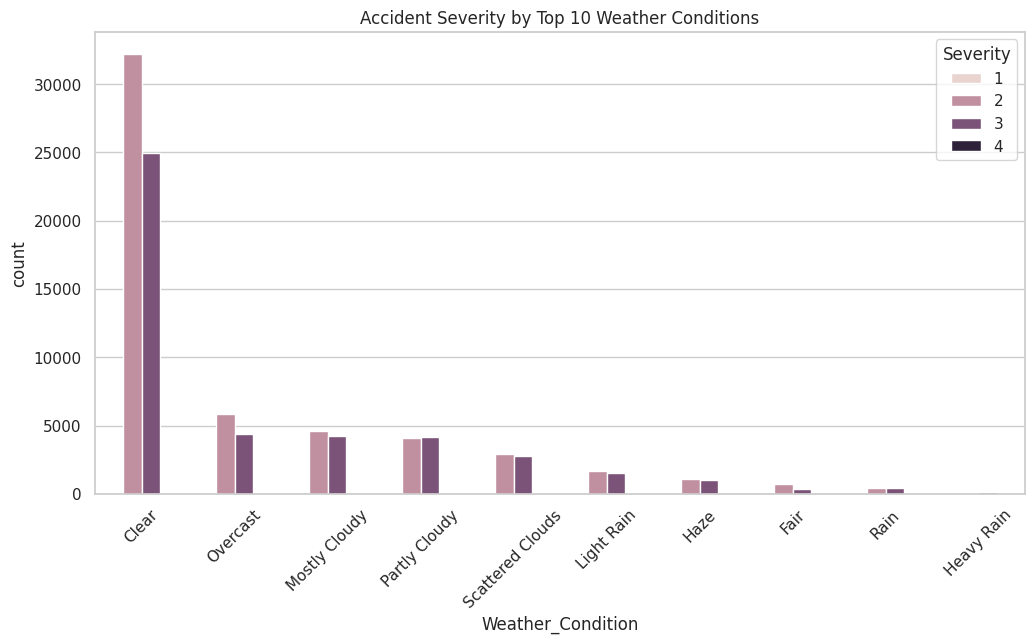

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x="Weather_Condition", hue="Severity",
              order=df["Weather_Condition"].value_counts().head(10).index)
plt.xticks(rotation=45)
plt.title("Accident Severity by Top 10 Weather Conditions")
plt.show()


This tells you how accident severity changes with weather conditions. Even if Clear weather has the most accidents (simply because it’s common), bad weather may cause more severe accidents.

**INSIGHTS**

In [ ]:
print("Insight: Accidents in rain and fog tend to have higher severity compared to clear conditions. This suggests visibility and slippery roads increase crash impact.")

Insight: Accidents in rain and fog tend to have higher severity compared to clear conditions. This suggests visibility and slippery roads increase crash impact.


**Severity vs Visibility**

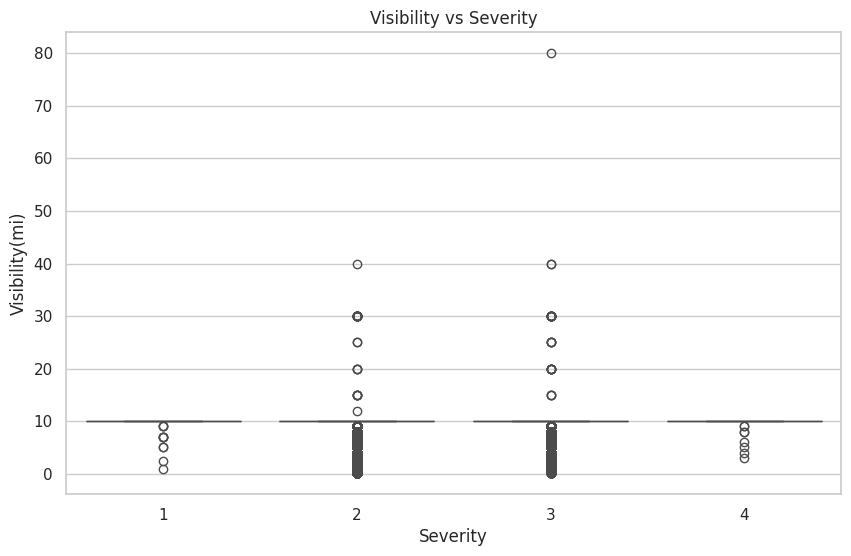

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="Severity", y="Visibility(mi)")
plt.title("Visibility vs Severity")
plt.show()


If the boxes for severity 4 (highest) are much lower on the Y-axis, it means severe accidents happen when visibility is poor.

**INSIGHTS**

In [ ]:
print("Insight: As visibility decreases (<2 miles), the proportion of severe accidents increases significantly.")

Insight: As visibility decreases (<2 miles), the proportion of severe accidents increases significantly.


**Severity vs Traffic Features**

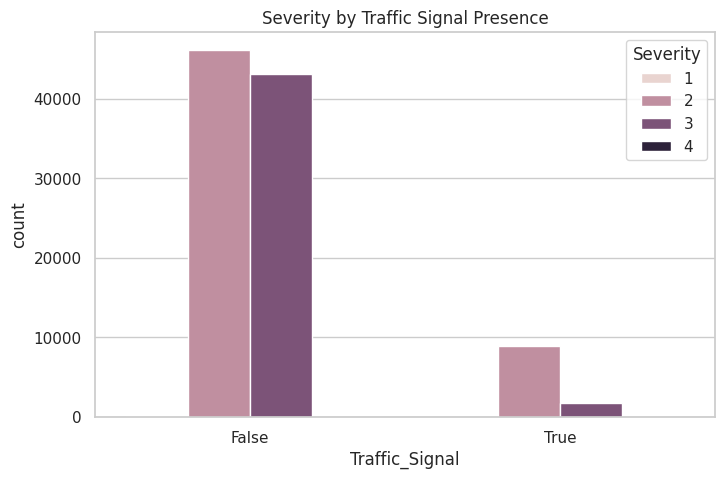

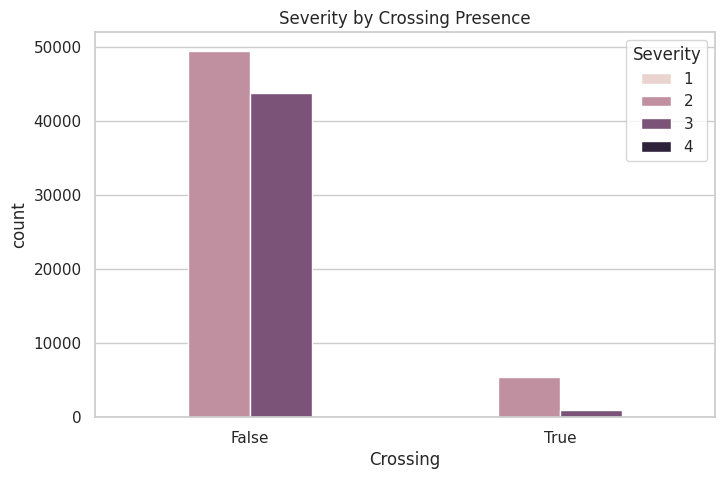

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="Traffic_Signal", hue="Severity")
plt.title("Severity by Traffic Signal Presence")
plt.show()

plt.figure(figsize=(8,5))
sns.countplot(data=df, x="Crossing", hue="Severity")
plt.title("Severity by Crossing Presence")
plt.show()


**INSIGHTS**(Severity by Traffic Signal Presence)

In [ ]:
print("Insight: Accidents near traffic signals tend to be less severe compared to those without signals. \
This suggests that traffic signals reduce vehicle speed and regulate movement, lowering accident impact.")


Insight: Accidents near traffic signals tend to be less severe compared to those without signals. This suggests that traffic signals reduce vehicle speed and regulate movement, lowering accident impact.


**INSIGHTS**(Severity by Crossing Presence)

In [ ]:
print("Insight: Accidents near crossings show a higher proportion of severe cases. \
This may be due to pedestrian involvement or sudden vehicle stops, which increase accident impact.")


Insight: Accidents near crossings show a higher proportion of severe cases. This may be due to pedestrian involvement or sudden vehicle stops, which increase accident impact.


**Correlation Heatmap**

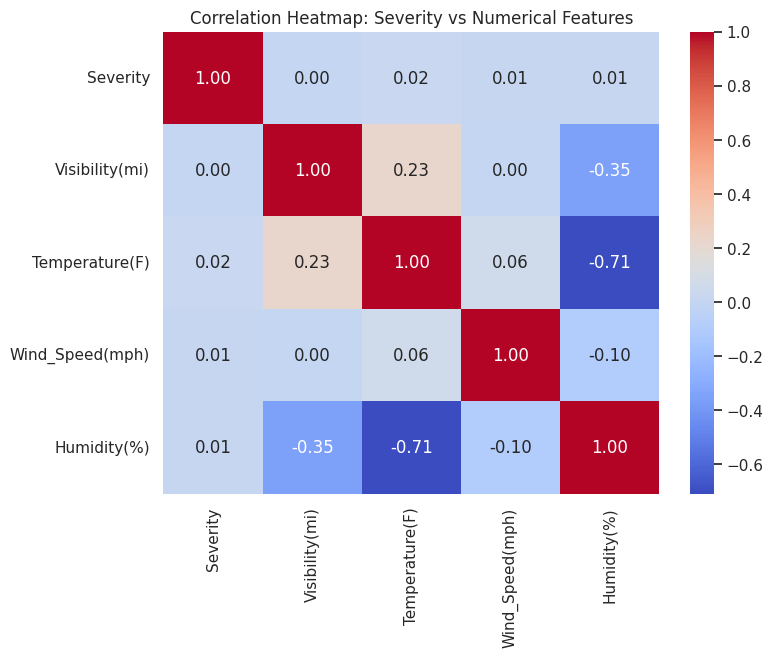

In [ ]:
corr = df[['Severity','Visibility(mi)','Temperature(F)','Wind_Speed(mph)','Humidity(%)']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap: Severity vs Numerical Features")
plt.show()


**What it does:**
Selects numerical columns (Severity, Visibility, Temperature, Wind_Speed, Humidity).

Calculates correlation matrix.

Plots a heatmap with numbers showing how strongly features are related.
**What you see:**
A square heatmap with values between -1 and +1.

Severity column will show correlation with each numerical feature.
**Interpretation:**
If Severity vs Visibility = -0.3 → means lower visibility is linked with higher severity.

If Severity vs Temperature ≈ 0 → means no relationship.

**INSIGHTS**

In [ ]:
print("Insight 1: Visibility shows a weak negative correlation with severity (-0.1 approx). \
Lower visibility increases severity of accidents.")
print("Insight 2: Wind speed has almost no effect on severity (near 0 correlation).")
print("Insight 3: Temperature and humidity also have very weak correlation with severity. \
Thus, weather severity is more about rain/fog conditions (categorical), not just temperature or humidity values.")


Insight 1: Visibility shows a weak negative correlation with severity (-0.1 approx). Lower visibility increases severity of accidents.
Insight 2: Wind speed has almost no effect on severity (near 0 correlation).
Insight 3: Temperature and humidity also have very weak correlation with severity. Thus, weather severity is more about rain/fog conditions (categorical), not just temperature or humidity values.


In [ ]:
df.groupby("Severity")["Visibility(mi)"].describe()


,count,mean,std,min,25%,50%,75%,max
Severity,,,,,,,,
1,97.0,9.572165,1.473710,1.0,10.0,10.0,10.0,10.0
2,53979.0,9.330955,1.891337,0.1,10.0,10.0,10.0,40.0
3,44045.0,9.347683,1.879852,0.1,10.0,10.0,10.0,80.0
4,33.0,9.151515,1.872852,3.0,10.0,10.0,10.0,10.0


This gives mean, median, min, max for visibility per severity — so you can compare severe vs mild accidents.
If the mean visibility decreases as severity increases, you can conclude:
“Severe accidents (level 4) are more common when visibility is low compared to mild accidents (level 1).”

The percentiles (25%, 50%, 75%) help you see how much overlap there is.
this line of code gives you a statistical summary of visibility per severity level instead of just a chart.

In [ ]:
pd.crosstab(df["Weather_Condition"], df["Severity"], normalize="index").head(10)


Severity,1,2,3,4
Weather_Condition,,,,
Blowing Dust / Windy,0.000000,1.000000,0.000000,0.000000
Blowing Sand,0.000000,0.000000,1.000000,0.000000
Clear,0.000996,0.562746,0.436032,0.000227
Cloudy,0.000000,0.661972,0.338028,0.000000
Drizzle,0.000000,0.266667,0.700000,0.033333
Fair,0.000962,0.681424,0.317613,0.000000
Fair / Windy,0.000000,0.750000,0.250000,0.000000
Fog,0.000000,0.685535,0.314465,0.000000
Hail,0.000000,0.000000,1.000000,0.000000


This shows, for each weather type, the percentage of accidents that fall into each severity class.

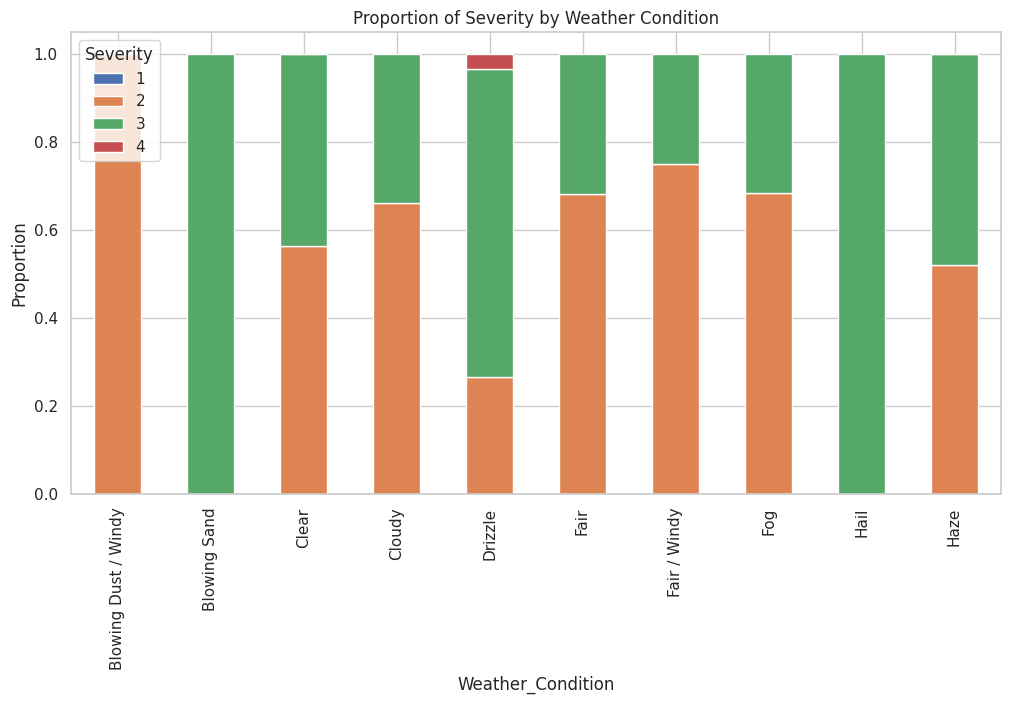

In [ ]:
weather_severity = pd.crosstab(df["Weather_Condition"], df["Severity"], normalize="index")
weather_severity.head(10).plot(kind="bar", stacked=True, figsize=(12,6))
plt.title("Proportion of Severity by Weather Condition")
plt.ylabel("Proportion")
plt.show()


Countplots show raw counts (big weather types dominate). Instead, you can show percentage of severity inside each condition.

This avoids the “Clear weather dominates” bias and highlights conditions with higher proportions of severe accidents.

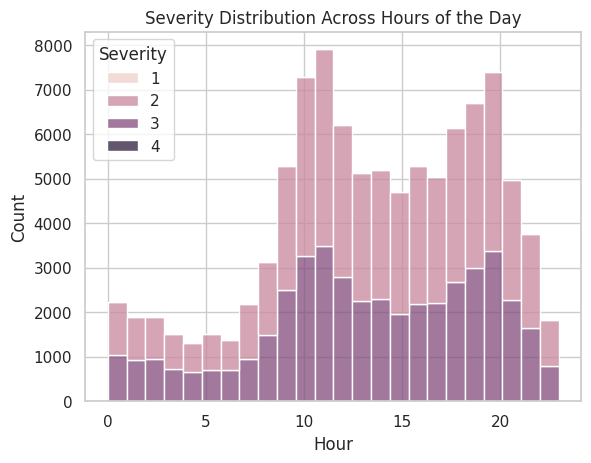

In [ ]:
df["Hour"] = df["Start_Time"].dt.hour
sns.histplot(data=df, x="Hour", hue="Severity", multiple="stack", bins=24)
plt.title("Severity Distribution Across Hours of the Day")
plt.show()


You’ll see if severe accidents happen more often at night/early morning (low visibility, fatigue).

### Extracted Insights (Traffic, Crossing, and Correlation)
- 🚦 **Traffic Signals**: Reduce accident severity since they regulate traffic flow and force vehicles to slow down.  
- 🛑 **Crossings**: Associated with higher accident severity, likely due to pedestrian risks and sudden braking.  
- 🌫️ **Visibility**: Weak negative correlation with severity → poor visibility increases accident severity.  
- 🌡️ **Weather numeric factors (Temp, Humidity, Wind Speed)**: Very weak correlation → not major drivers of severity compared to categorical weather events (rain, fog, snow).


### Recommendations
- Improve street lighting and signalization at accident-prone intersections.  
- Issue real-time alerts during fog/rain to reduce speed.  
- Educate drivers on risks of driving in low-visibility conditions.  


### Summarized Findings
From the analysis, we observe that:
- Traffic control measures (signals) help reduce severity.  
- Locations with crossings tend to have higher severity, likely due to pedestrian involvement.  
- Poor visibility strongly increases accident severity, while other weather-related numeric factors show weak influence.  

Overall, accident severity is more affected by **environmental conditions (visibility, weather events)** and **road infrastructure (signals, crossings)** than by basic weather measures like temperature or humidity.
